<a href="https://colab.research.google.com/github/AniketRao/Titanic-Survival-Prediction/blob/main/Titanic_Data_Set_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   #                              PREDICTING THE SURVIVAL OF TITANIC PASSENGER.

# 1.Description


The principal source for data about Titanic passengers is the Encyclopedia Titanica.

   **1.1. CONTEXT**

1.The main objetive is to classify the pasengers travelled during Titanic Journey is survived or non survived.\
2.The data set contains journey information features of the passengers.

**1.2. PROBLEM STATEMENT**


Classify the class of Survival Or Non-Survival.

# 2. Machine Learning Problem Formulation


**2.1 DATA OVERVIEW**

Source:https:https://www.kaggle.com/c/titanic/data?select=train.csv\

Survival : 0 = No, 1 = Yes

pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd

Sex(Gender) : Male, Female

Age : Age in years

SibSp : Number of siblings/spouses abroad the titanic

Parch : Number of parents/children abrod the titanic

Ticket : Ticket Number 

Fare : Passenger fare 

Cabin : Cabin Number 

Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton.

**2.2 Mapping the Real World Problem to Machine Learning**

**2.2.1. Type of Machine Learning Problem**

There are two different classes of Survived which can be clasified into = classification problem

**2.2.2. Performamce Matrix**

Source:https://www.kaggle.com/c/titanic/data?select=train.csv\ 

Metric(s):

**f1-score\
Confusion Matrix**

# 3. Data Preprocessing.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Loading of data set

In [7]:
Train=pd.read_csv('/content/Train Titanic.csv')
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
Train.shape

(891, 12)

In [10]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
Train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1.Age contains 177 NULL VALUE.

2.Cabin Contains 687 NULL VALUE( Hence we will drop ).

3.Embarked contains 2 NULL VALUE.

In [13]:
Train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [14]:
Train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


As Machine Model Understand Only Numeric Language So We Have To Convert text Feature To Numeric(Sex And Embarked in Train set)

In [15]:
Train['Sex']=Train['Sex'].map({'male':1,'female':2})
Train['Embarked']=Train['Embarked'].map({'S':1,'C':2,'Q':3})


For classification we want our class in string hence we convert Feature


In [16]:
Train['Survived']=Train['Survived'].map({0:"No",1:'Yes'})

In [17]:
Train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,3,1,22.0,1,0,7.2500,1.0
1,Yes,1,2,38.0,1,0,71.2833,2.0
2,Yes,3,2,26.0,0,0,7.9250,1.0
3,Yes,1,2,35.0,1,0,53.1000,1.0
4,No,3,1,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,No,2,1,27.0,0,0,13.0000,1.0
887,Yes,1,2,19.0,0,0,30.0000,1.0
888,No,3,2,NaN,1,2,23.4500,1.0
889,Yes,1,1,26.0,0,0,30.0000,2.0


In [18]:
Train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
#filling of average year in the NAN values of Age & Embarked          **** imp *****
Train['Age']=Train['Age'].fillna(Train['Age'].mean())
Train['Embarked']=Train['Embarked'].fillna(Train['Embarked'].mode()[0])


In [20]:
Train['Sex'].value_counts()

1    577
2    314
Name: Sex, dtype: int64

In [21]:
Train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Here we finished our completing our filling our null values by mean
Also we have completed our mapping.**

***Test Data Set***

In [22]:
Test=pd.read_csv('/content/Test Titanic.csv')
Test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
Class_test=pd.read_csv('/content/gender_submission.csv')
Class_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [24]:
Test_Data=pd.concat([Test,Class_test],axis=1)
Test_Data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1305,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1306,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1307,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1308,0


In [25]:
Test_Data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,PassengerId,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,1100.500000,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,120.810458,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,892.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,996.250000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1100.500000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1204.750000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1309.000000,1.000000


In [26]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  PassengerId  418 non-null    int64  
 12  Survived     418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [27]:
Test_Data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)


In [28]:
Test_Data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,0
414,1,female,39.0,0,0,108.9000,C,1
415,3,male,38.5,0,0,7.2500,S,0
416,3,male,NaN,0,0,8.0500,S,0


In [29]:
Test_Data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Survived     0
dtype: int64

In [30]:
Test_Data['Age']=Test_Data['Age'].fillna(Test_Data['Age'].mean())
Test_Data['Fare']=Test_Data['Fare'].fillna(Test_Data['Fare'].mean())

In [31]:
## Checking whether all features values are not null
Test_Data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [32]:
##Mapping the Feature to int  & class to string for giving the machine learing model.


In [33]:
Test_Data['Sex']=Test_Data['Sex'].map({'male':1,'female':2})
Test_Data['Embarked']=Test_Data['Embarked'].map({'S':1,'C':2,'Q':3})

In [34]:
Test_Data['Survived']=Test_Data['Survived'].map({0:'No',1:'Yes'})

In [35]:
Test_Data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.50000,0,0,7.8292,3,No
1,3,2,47.00000,1,0,7.0000,1,Yes
2,2,1,62.00000,0,0,9.6875,3,No
3,3,1,27.00000,0,0,8.6625,1,No
4,3,2,22.00000,1,1,12.2875,1,Yes
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,1,No
414,1,2,39.00000,0,0,108.9000,2,Yes
415,3,1,38.50000,0,0,7.2500,1,No
416,3,1,30.27259,0,0,8.0500,1,No


# 04.Exploratory Data Analysis.

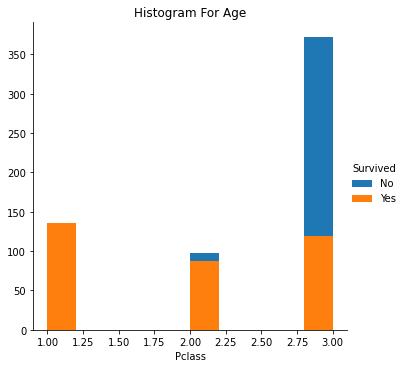

In [36]:
sns.FacetGrid(Train,hue='Survived',height=5)\
.map(plt.hist,'Pclass')\
.add_legend();
plt.title('Histogram For Age')
plt.show()

**1.Majority of passengers survived from Pclass 1 .**

**2.Majority of passengers from Pclass 2 and Pclass 3 non-survival rate is more.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


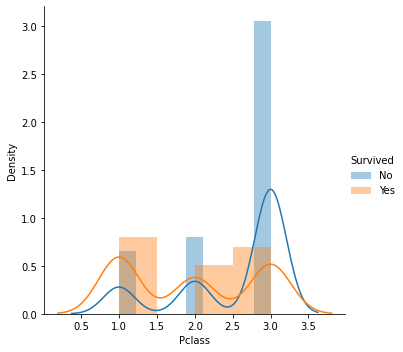

In [37]:
sns.FacetGrid(Train,hue='Survived',height=5)\
.map(sns.distplot,'Pclass')\
.add_legend();
plt.show()

**The density of survival rate is more in Pclass 1 as compared to Pclass 2 and Pclass 3.**

# Box plot

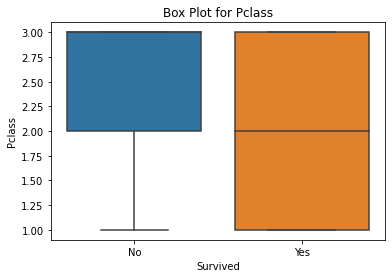

In [38]:
sns.boxplot(x='Survived',y='Pclass',data=Train)
plt.title('Box Plot for Pclass')
plt.show()

**Observation: Death Rate is maximum in Pclass 2 and Pclass3.**

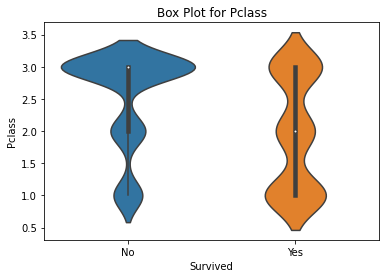

In [39]:
sns.violinplot(x='Survived',y='Pclass',data=Train)
plt.title('Box Plot for Pclass')
plt.show()

**1.The density of survival rate is observed maximum in Pclass 1.**

**2.The density of death rate is observed is maximum in Pclass 3.**

# Count plot

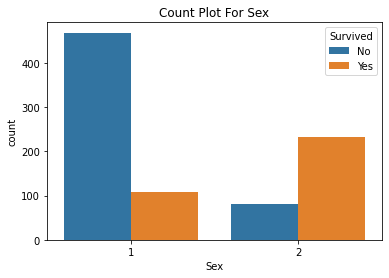

In [40]:
sns.countplot(x='Sex',hue='Survived',data=Train)
plt.title('Count Plot For Sex')
plt.show()

**1. The non-survival rate is more in case of male gender.**

**2.The survival rate is more in case of female gender.**

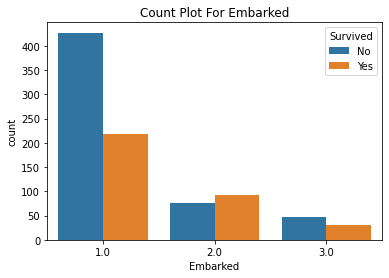

In [41]:
sns.countplot(x='Embarked',hue='Survived',data=Train)
plt.title('Count Plot For Embarked')
plt.show()

**Embarked Port of Embarkation [S(1)=Southampton ;C(2)= Cherbourg; Q(3) = Queenstown)]**

**Embarkation from Southampton = Death Rate is more.**

**Embarkation from Cherbourg = Almost Survival Rate and Death rate is same.**

**Embarkation from Qeenstown = Death rate is slightly high.**


In [42]:
#Pairplot

<Figure size 432x288 with 0 Axes>

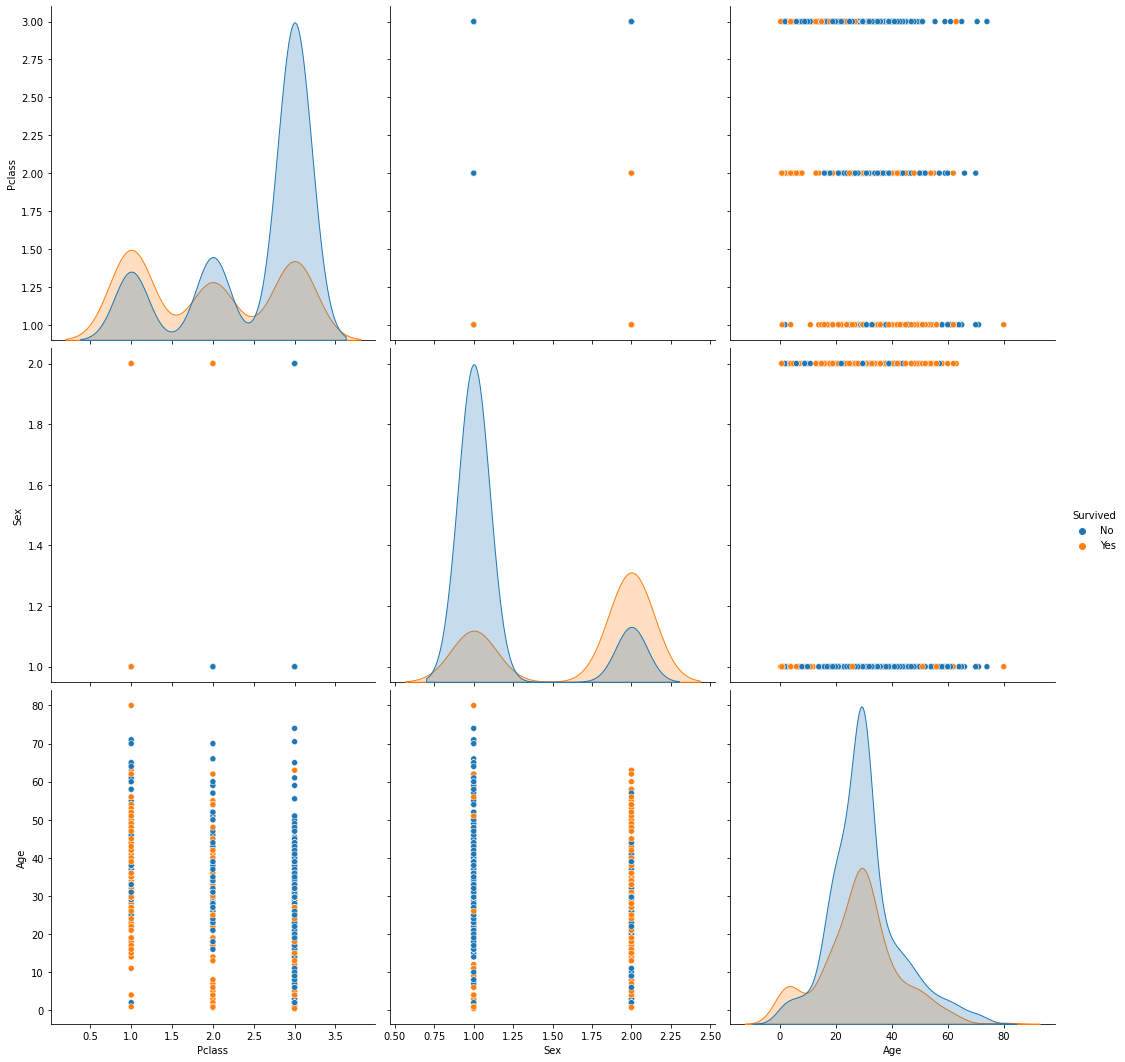

In [43]:
plt.figure()
feature=['Survived','Pclass','Sex','Age',]
sns.pairplot(Train[feature], hue='Survived',height=5)
plt.show()

**1. For Age range 10 to 60 the survival of passenger in Pclass 1  is more than Pclass 2 and Pclass 3.**

**2.The death rate is more for Age range 08 to 75 for gender male  as compared to female gender.**

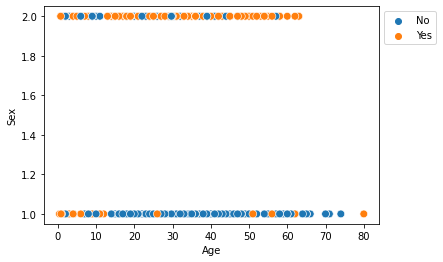

In [44]:
sns.scatterplot(x='Age',y='Sex',data=Train,hue='Survived',s=60)
plt.legend(bbox_to_anchor=(1,1 ), loc=2)
plt.show()

**The Survival rate of female gender is more for age range 5 to 65 as compared to male gender.**

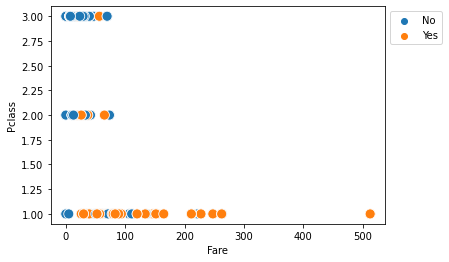

In [45]:
sns.scatterplot(x='Fare',y='Pclass',data=Train,hue='Survived',s=100)
plt.legend(bbox_to_anchor=(1,1 ), loc=2)
plt.show()

**Higher the passenger fare higher the survival rate is observed !**

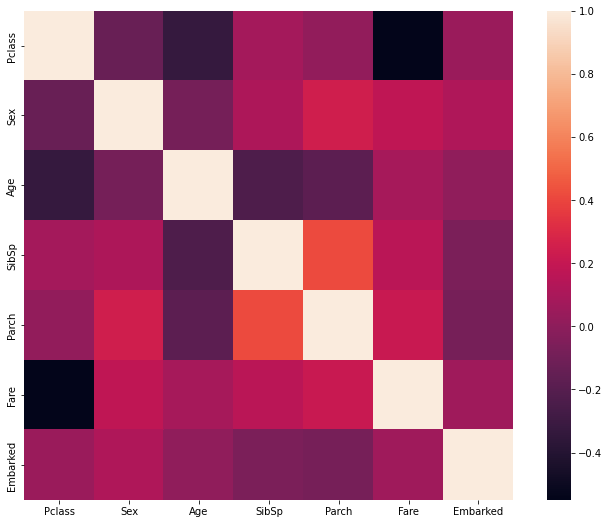

In [46]:
visual=plt.figure(figsize=(12,9))
sns.heatmap(Train.corr(),vmax=1,square=True)
plt.show()

**A good correlation is observed = Parch and SibSp.**

**A bad correlation is observed =Fare and Pclass , Age and Pclass.**

#  05. Model Building

In [75]:
##Train Train Split
x_train=Train.drop(columns='Survived')
y_train=Train['Survived']

In [48]:
x_test=Test_Data.drop(columns='Survived')
y_test=Test_Data['Survived']

In [49]:
len(x_train)

891

In [50]:
len(y_train)

891

In [51]:
len(x_test)

418

In [52]:
len(y_test)

418

In [53]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit_transform(x_train)
std.fit(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

**01 DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

DT = DecisionTreeClassifier()

parameters={'criterion':['gini'],
            'splitter': ['best','random'],
           'max_depth':[2,10,20,25,40,None],
           'min_samples_split':[2,4,5,10,12],
           'min_samples_leaf':[1,2,3,6]}
           
RS=RandomizedSearchCV(DT,parameters)
RS.fit(x_train,y_train)

In [55]:
RS.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'best'}

In [56]:
RS.best_score_

0.8171175695185487

In [57]:
DT = DecisionTreeClassifier(splitter= 'random',
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_depth= 20,
 criterion= 'gini'
)
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [58]:
#predicting testing data
y_pred=DT.predict(x_test)

In [59]:
#calculation of accuracy score
print('Train Data Score',accuracy_score(y_train,DT.predict(x_train))*100)
print('Test Data Score',accuracy_score(y_test,DT.predict(x_test))*100)

Train Data Score 86.64421997755332
Test Data Score 85.4066985645933


In [60]:
print(confusion_matrix(y_test,y_pred))

[[240  26]
 [ 35 117]]


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       266
         Yes       0.82      0.77      0.79       152

    accuracy                           0.85       418
   macro avg       0.85      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418



**Test Accuracy obtained from DECISION TREE is 84.21%**

**02. LOGISTIC REGRESSION**

In [62]:
%%time
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

CPU times: user 33 ms, sys: 0 ns, total: 33 ms
Wall time: 33.3 ms


In [63]:
y_pred=LR.predict(x_test)

In [64]:
print('Train_Score',accuracy_score(y_train,LR.predict(x_train))*100)
print('Test_Score',accuracy_score(y_test,LR.predict(x_test))*100)

Train_Score 80.47138047138047
Test_Score 94.25837320574163


In [65]:
print(confusion_matrix(y_test,y_pred))

[[254  12]
 [ 12 140]]


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.95      0.95      0.95       266
         Yes       0.92      0.92      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



**Test Accuracy obtained from LOGISTIC REGRESSION is 94.25%**

**3. RANDOM FOREST CLASSIFIER**

In [67]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_class=RandomForestClassifier()

para_meter={'n_estimators':[100,200,300,500],
            'criterion':['gini'],
            'max_depth':[3,5,10,None],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[1,2,3,4]
    
}

rsv=RandomizedSearchCV(random_class,para_meter,n_jobs=-1)
rsv.fit(x_train,y_train)


CPU times: user 644 ms, sys: 64.8 ms, total: 709 ms
Wall time: 22.7 s


In [68]:
rsv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [69]:
rsv.best_score_

0.8272048207896555

In [70]:
random_class=RandomForestClassifier(n_estimators= 200,
 min_samples_split=5,
 min_samples_leaf=3,
 max_depth= None,
 criterion= 'gini')
random_class.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_pred=random_class.predict(x_test)

In [72]:
#calculation of accuracy score
print('Train Data Score',accuracy_score(y_train,random_class.predict(x_train))*100)
print('Test Data Score',accuracy_score(y_test,random_class.predict(x_test))*100)

Train Data Score 89.78675645342312
Test Data Score 86.8421052631579


In [73]:
print(confusion_matrix(y_test,y_pred))

[[244  22]
 [ 33 119]]


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       266
         Yes       0.84      0.78      0.81       152

    accuracy                           0.87       418
   macro avg       0.86      0.85      0.86       418
weighted avg       0.87      0.87      0.87       418



**Test Accuracy obtained from RANDOM FOREST CLAASIFIER is 86.84%**

# 06. Conclusion

**Test Accuracy obtained from DECISION TREE is 84.21%**

**Test Accuracy obtained from LOGISTIC REGRESSION is 94.25%**

**Test Accuracy obtained from RANDOM FOREST CLAASIFIER is 86.84%**

